# Modeling the 2016 US Presidential Election using Random Forest Regression and Classification
*Method inspired by [Full Titanic Example with Random Forest](https://www.youtube.com/watch?v=0GrciaGYzV0)*


## Loading the data:

In [1]:
import pandas as pd

census_data = pd.read_csv('combined_data.csv')

feature_cols = ['BLACK_FEMALE_rate', 
                'BLACK_MALE_rate',
                'Percent of adults with a bachelor\'s degree or higher, 2010-2014',
                'ASIAN_MALE_rate',
                'ASIAN_FEMALE_rate',
                '25-29_rate',
                'age_total_pop',
                '20-24_rate',
                'Deep_Pov_All',
                '30-34_rate',
                'Density per square mile of land area - Population',
                'Density per square mile of land area - Housing units',
                'Unemployment_rate_2015',
                'Deep_Pov_Children',
                'PovertyAllAgesPct2014',
                'TOT_FEMALE_rate',
                'PerCapitaInc',
                'MULTI_FEMALE_rate',
                '35-39_rate',
                'MULTI_MALE_rate',
                'Percent of adults completing some college or associate\'s degree, 2010-2014',
                '60-64_rate',
                '55-59_rate',
                '65-69_rate',
                'TOT_MALE_rate',
                '85+_rate',
                '70-74_rate',
                '80-84_rate',
                '75-79_rate',
                'Percent of adults with a high school diploma only, 2010-2014',
                'WHITE_FEMALE_rate',
                'WHITE_MALE_rate',
                'Amish',
                'Buddhist',
                'Catholic',
                'Christian Generic',
                'Eastern Orthodox',
                'Hindu',
                'Jewish',
                'Mainline Christian',
                'Mormon',
                'Muslim',
                'Non-Catholic Christian',
                'Other',
                'Other Christian',
                'Other Misc',
                'Pentecostal / Charismatic',
                'Protestant Denomination',
                'Zoroastrian',
                'Percent of adults with less than a high school diploma, 2010-2014',
                'MedHHInc2014',
                'PovertyUnder18Pct2014',
                'POP_ESTIMATE_2015',
                'Housing units',
                'Area in square miles - Total area',
                'Area in square miles - Water area',
                'Area in square miles - Land area',
                '0-4_rate',
                '5-9_rate',
                '10-14_rate',
                '15-19_rate',
                '40-44_rate',
                '45-49_rate',
                '50-54_rate',
                'NATIVE_AMERICAN_MALE_rate',
                'NATIVE_AMERICAN_FEMALE_rate',
                'HAWAIIAN_PACIFIC_MALE_rate',
                'HAWAIIAN_PACIFIC_FEMALE_rate',
                'voter_turnout_rate'
                ]


X = census_data[feature_cols]
y = census_data['Democrat']


## Fitting the regressor model:

In [2]:
from sklearn.ensemble import RandomForestRegressor

rf_regression_model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

rf_regression_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

## Fitting the classifier model:

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_classification_model = RandomForestClassifier(n_estimators=100, oob_score=True,random_state=42)

rf_classification_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

## Plotting feature importance

### Random forest regression model:

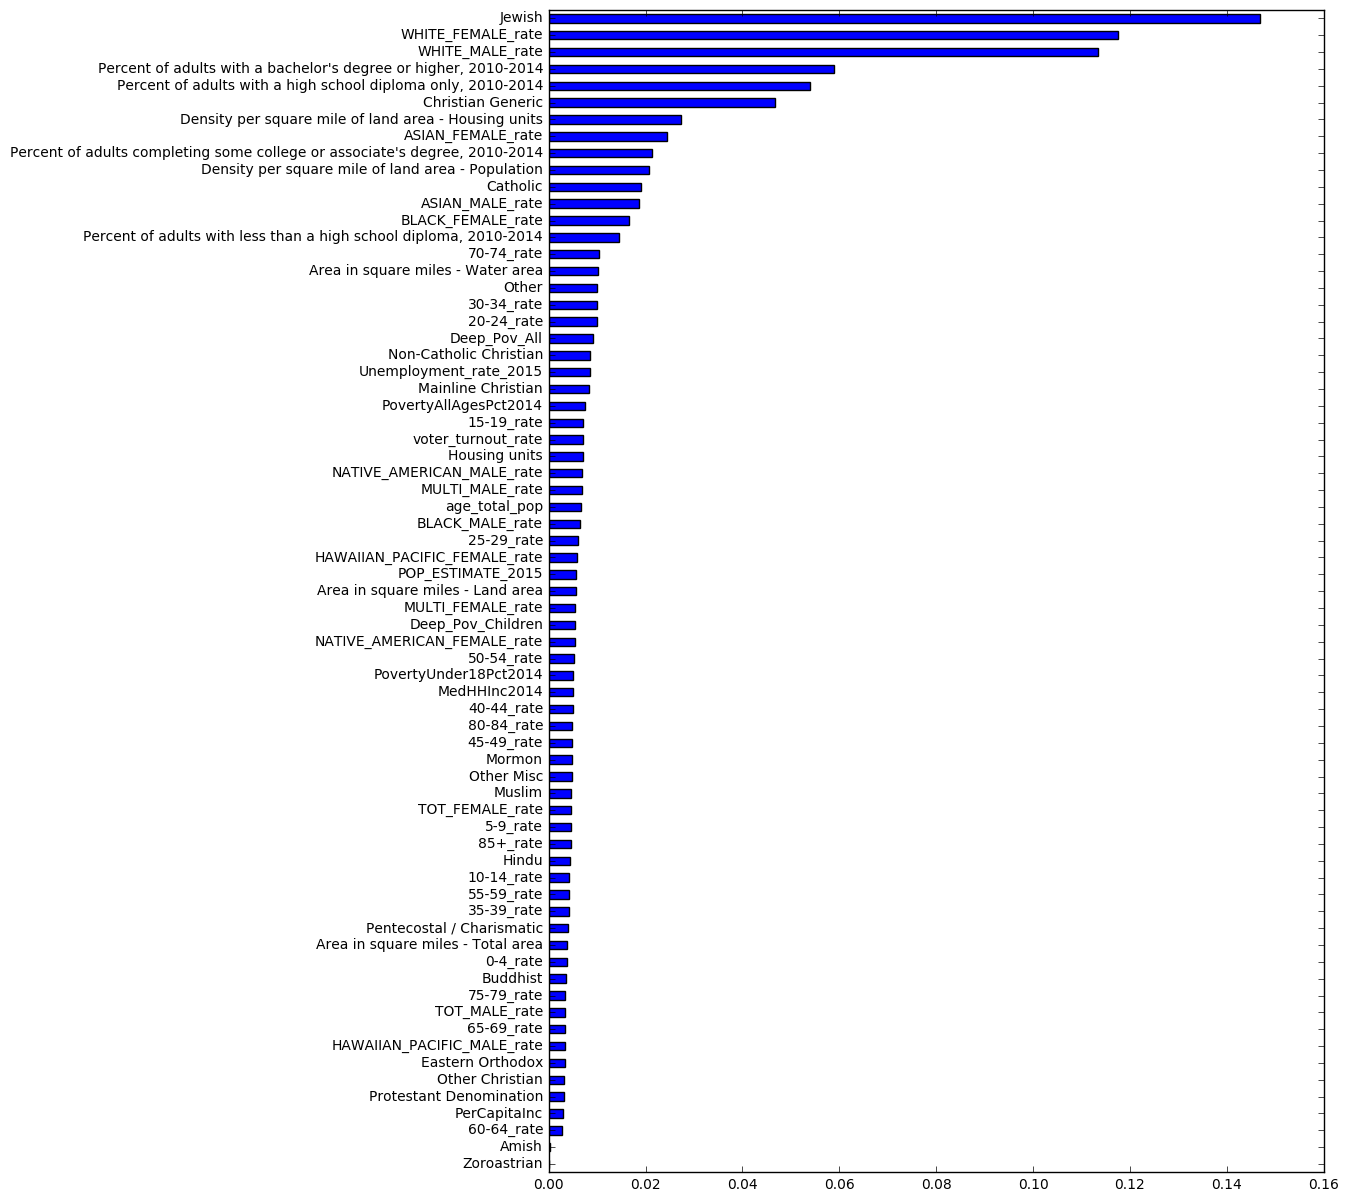

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rf_regression_model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,15));

### Random forest classification model:

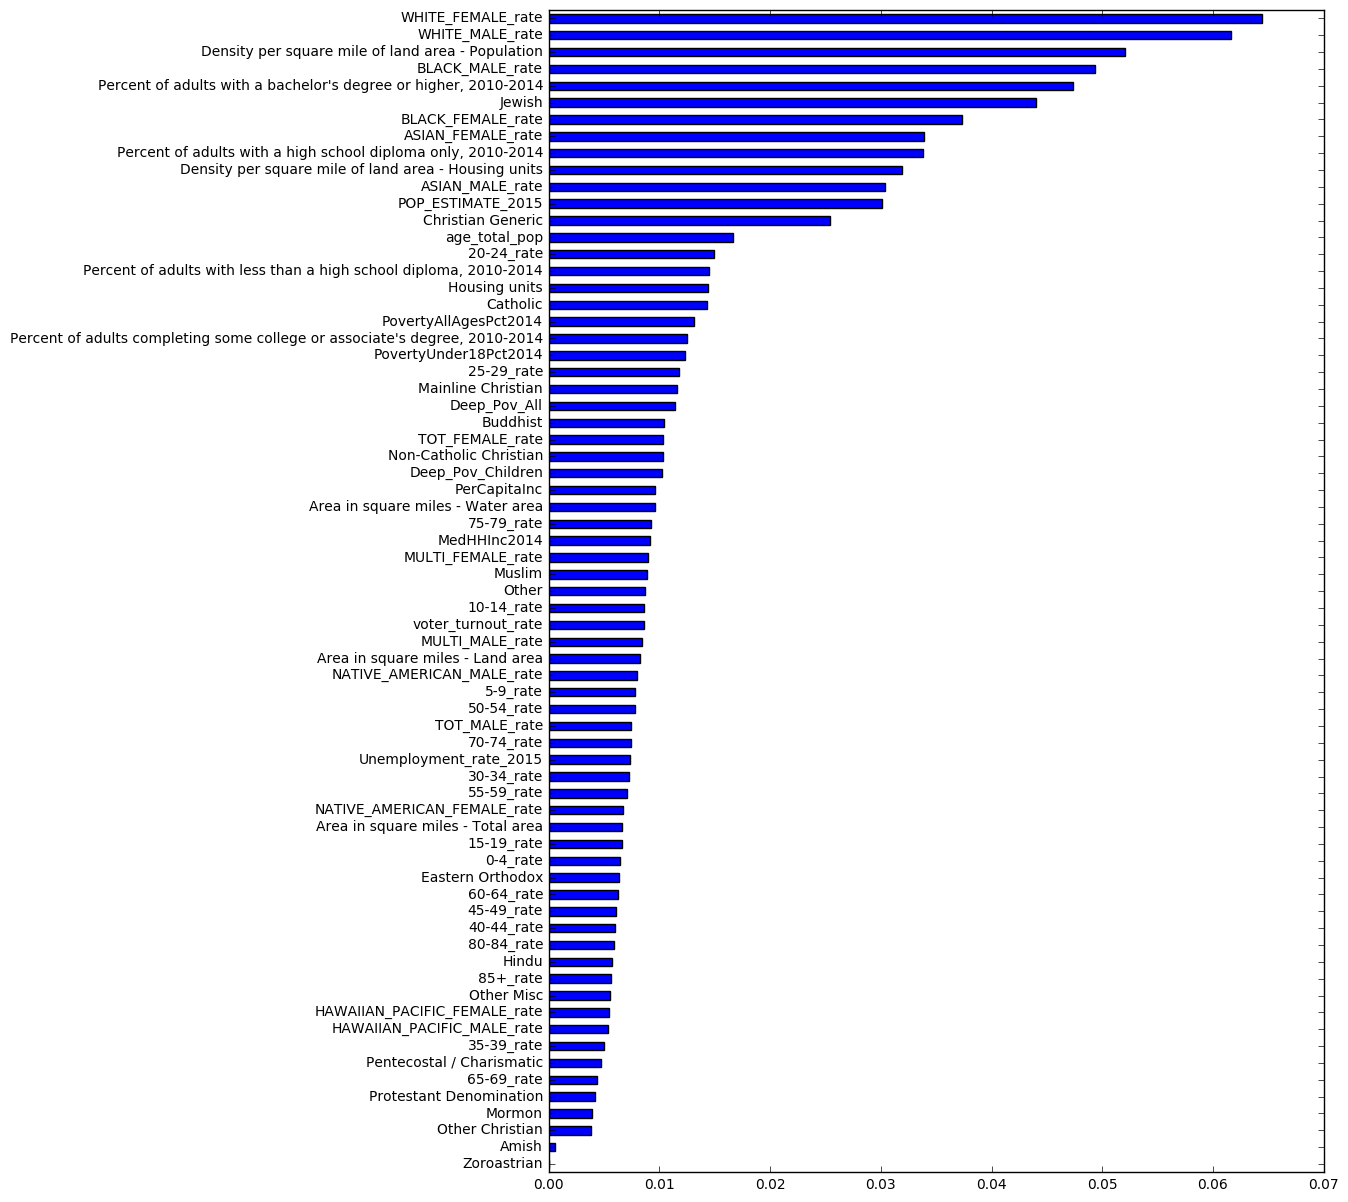

In [89]:
feature_importances = pd.Series(rf_classification_model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,15));

# Hyperparameter optimization

## Finding the optimal number of trees:

30 trees
roc: 0.947346911535

50 trees
roc: 0.954585391132

100 trees
roc: 0.961170609527

200 trees
roc: 0.965893797944

500 trees
roc: 0.967595260716

1000 trees
roc: 0.968344705208

2000 trees
roc: 0.968364334451



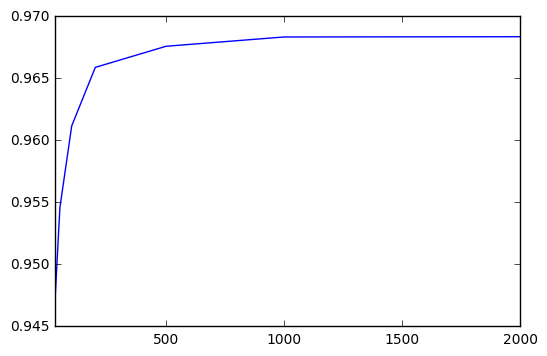

In [90]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    rf_regression_model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    rf_regression_model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, rf_regression_model.oob_prediction_)
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, n_estimator_options).plot();

In [6]:
from sklearn.cross_validation import cross_val_score

results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    rf_classification_model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    rf_classification_model.fit(X, y)
    print trees, "trees"
    scores = cross_val_score(rf_classification_model, X, y, cv=10, scoring='roc_auc')
    roc = scores.mean()
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, n_estimator_options).plot();

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


30 trees
roc: 0.955106111357

50 trees
roc: 0.958815710637

100 trees
roc: 0.958058133729

200 trees
roc: 0.958338518537

500 trees
roc: 0.959078365114

1000 trees
roc: 0.959640531067

2000 trees
roc: 0.960222781933



### Finding the optimal number of features to consider when looking for the best split

In [47]:
results = []
max_feature_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_feature_options:
    rf_regression_model = RandomForestRegressor(n_estimators = 2000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    rf_regression_model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, rf_regression_model.oob_prediction_)
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, max_feature_options).plot(kind="barh", xlim=(.85, .99));

auto option
roc: 0.968364334451



KeyboardInterrupt: 

In [5]:
results = []
max_feature_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_feature_options:
    rf_classifier_model = RandomForestClassifier(n_estimators = 2000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    rf_classifier_model.fit(X, y)
    print max_features, "option"
    scores = cross_val_score(rf_classifier_model, X, y, cv=10, scoring='accuracy')
    roc = scores.mean()
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, max_feature_options).plot(kind="barh", xlim=(.85, .99));

auto option


NameError: name 'cross_val_score' is not defined

## Finding the optimal number for the minimum number of samples required to be at a leaf node:

In [ ]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    rf_regression_model = RandomForestRegressor(n_estimators = 2000, oob_score=True, n_jobs=-1, random_state=42, max_features = 0.2, min_samples_leaf = min_samples)
    rf_regression_model.fit(X, y)
    print min_samples, "min_samples"
    roc = roc_auc_score(y, rf_regression_model.oob_prediction_)
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, min_samples_leaf_options).plot();

In [ ]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    rf_classifier_model = RandomForestRegressor(n_estimators = 2000, oob_score=True, n_jobs=-1, random_state=42, max_features = 0.2, min_samples_leaf = min_samples)
    rf_classifier_model.fit(X, y)
    print min_samples, "min_samples"
    scores = cross_val_score(rf_classifier_model, X, y, cv=10, scoring='accuracy')
    roc = scores.mean()
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, min_samples_leaf_options).plot();

## Write predictions for the data set

In [63]:
# predict the response for new observations

census_data['RF_prediction'] = model.predict(X)
census_data.to_csv('census_data_with_predictions.csv')

## Evaluate models based on ROC AUC score:

### Logistic regression:

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.916873306008


### K-nearest neighbors:

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# 10-fold cross-validation with K=31 for KNN
knn = KNeighborsClassifier(n_neighbors=21, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')

print(scores.mean())

0.806361809374


### Random forest classifier:

In [19]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 2000,
                             oob_score = True,
                             n_jobs = -1,
                             random_state=42,
                             max_features = 0.2,
                             min_samples_leaf = 1)

rf_model.fit(X, y)
scores = cross_val_score(rf_model, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.960546443003


### Random forest regressor:

In [4]:
model = RandomForestRegressor(n_estimators = 2000,
                             oob_score = True,
                             n_jobs = -1,
                             random_state=42,
                             max_features = 0.2,
                             min_samples_leaf = 1)

model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "auc: ", roc

NameError: name 'roc_auc_score' is not defined

In [12]:
from sklearn.tree import export_graphviz
from os import system 
from sklearn import tree

def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
i_tree = 0

for tree_in_forest in rf_regression_model.estimators_:
    build_tree_image(tree_in_forest)
    
    
    
#    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
#        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
#    i_tree = i_tree + 1
    
    
    


    


In [14]:
#print rf_regression_model.estimators_

print decision_path

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=1608637542, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=1273642419, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=1935803228, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min